# 2. Clasificación:

x=Features, variables de predicción, variables independientes.

y=Targets, variables objetivo, variables dependientes, variables de respuesta.



# 2.1 Modelos lineales para clasificación:

El objetivo en clasificación es tomar un vector de entrada $x$ y asignarlo a una de las clases discretas $C_k$, donde $k=1,..., K$. En el esceneario más común las clases se asumen como disjuntas. El espacio de entrada entonces, es dividido en fronteras de decisión o superficies de decisión. En los modelos lineales de clasificación, se considera que las superficies de decisión (o fronteras) son hiperplanos lineales dentro del espacio D-dimensional de entrada. También se asume que los datos pueden ser separados exactamente por una supercicie linealmente separable. 


Para problemas de regresión, la variable objetivo $t$ es simplemente un vector de números reales que se desea predecir. En el caso de clasificación, es posible ver los variables objetivo como formas de representar una clase. En el caso de clasificación binaria es posible ver la variable objetivo como $t\in {0,1}$ tal que $t=1$ para representar a $C_1$ y $t=0$ para representar a $C_2$. Para K>2, es conveniente utilizar un esquema de código que permita identificar las clases, por ejemplo, en el caso de $K=5$, la clase 2 se puede representar como $t=(0,1,0,0,0)^T$. 

A diferencia del caso de regresión. En esta ocasión se desea obtener un modelo en el cual transformemos la función lineal de $w$ usando una función no lineal $f(\cdot)$ tal que 

\begin{equation}
y(x)=f(w^T x+w_0)
\end{equation}

Esta función $f$ se conoce como la función de activación. Debido a la linealidad de esta función, este tipo de funciones, se conocen en general como funciones de clasificación lineales o modelos lineales de clasificación. 

El análisis y las características que se describirán a continuación también son aplicables para casos en los que se realicen transformaciones no-lineales a las variables de entrada a través de un vector base de funciones $\phi(x)$. 


## Funciones discriminantes:

Una función discriminante toma un vector de entrada y lo asigna a una de las K clases, denotada como $C_k$. 




In [1]:
from sklearn import datasets

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

iris=datasets.load_iris()

X=iris.data
y=iris.target


#print(X)
#print(y)

df=pd.DataFrame(X,columns=iris.feature_names)

_=pd.plotting.scatter_matrix(df,c=y,figsize=[8,8],s=150,marker='D')


# 2.2 k-nearest neighbors:

La idea básica de k-nearest neighbors es encontrar la etiqueta de un punto nuevo a partir de un conjunto de datos ya etiquetados. Para ello se mirarn los "k" vecinos más cercanos y se decide por mayoría. 


A partir de un conjunto de datos, obtengamos un clasificador y saquemos un score de la clasificación

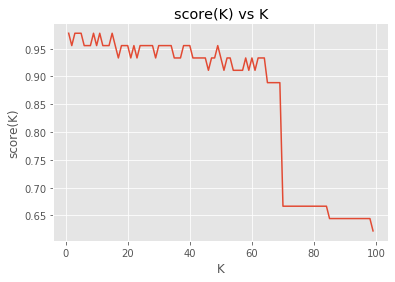

In [33]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)

k=np.arange(1,100)
sk=[]

for k_ in k:
    knn=KNeighborsClassifier(n_neighbors=k_)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    sk.append(knn.score(X_test,y_test))
    
plt.plot(k,np.array(sk))
plt.xlabel('K')
plt.ylabel('score(K)')
plt.title('score(K) vs K')
plt.show()

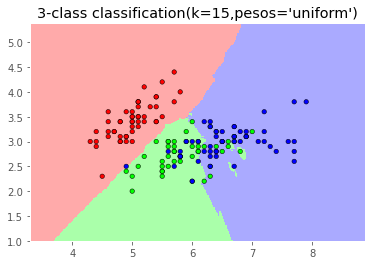

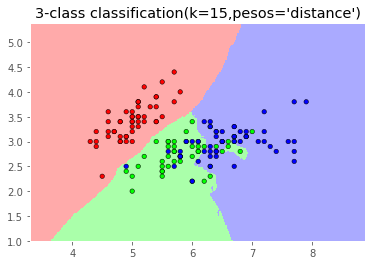

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors=15

iris=datasets.load_iris()

X=iris.data[:,:2]
y=iris.target

h=.02

cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])

for weights in ['uniform','distance']:
    clf=neighbors.KNeighborsClassifier(n_neighbors,weights=weights)
    clf.fit(X,y)
    
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    
    plt.figure()
    
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolor='k',s=20)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.title("3-class classification(k=%i,pesos='%s')"%(n_neighbors,weights))

plt.show()


# 2.3 Regresión logística

Es posibleexpresar la probabilidad a posteriori de la clase $C_1$ como una sigmoide logística actuando sobre una función lineal en un vector de características $\phi$. 

\begin{equation}
p(C_1|\phi)=y(\phi)=\sigma(w^T \phi)
\end{equation}

con $p(C_2|\phi)=1-p(C_1|\phi)$. Aquí, $\sigma$ es la función logística de activación, definida como:

\begin{equation}
\sigma=\frac{1}{1+e^{-a}}
\end{equation}

Utilizando maximum likelihood para determinar los parámetros del modelo de regresión logística, es posible sacar la derivada de la función de activación logística sigmoidal que puede ser expresada como 

\begin{equation}
\frac{d\sigma}{da}=\sigma (1-\sigma)
\end{equation}

A partir de esta formulación podemos obtener que 

\begin{equation}
E(w)=-ln(p(t|w))=-\sum_{n=1}^{N}{t_n ln(y_n)+(1-t_n)ln(1-y_n)}
\end{equation}

donde $y_n=\sigma(a_n)$ y $a_n=w^T\phi_n$, por lo que 

\begin{equation}
\nabla E(w)=\sum_{n=1}^{N}{(y_n-t_n)\phi_n}
\end{equation}

Con lo que tenemos suficiente para construir un algoritmo secuencial para lograr clasificación logística. 


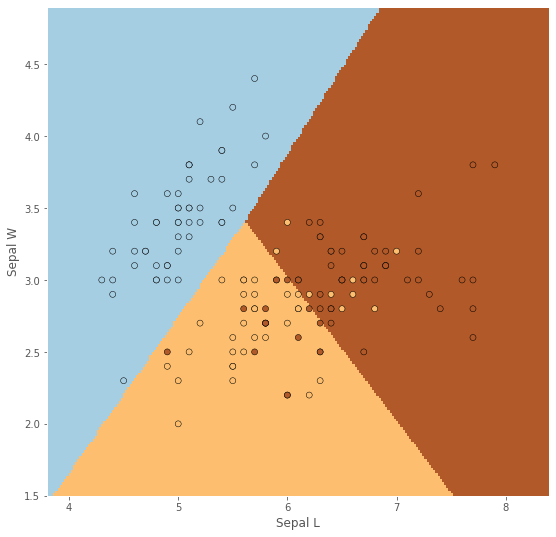

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets


iris=datasets.load_iris()
X=iris.data[:,:2]
Y=iris.target

logreg=LogisticRegression(C=1e5,solver='lbfgs',multi_class='ovr')


logreg.fit(X,Y)


x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5

h=.02

xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=logreg.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)

plt.figure(1,figsize=(9,9))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0],X[:,1],c=Y,edgecolors='k',cmap=plt.cm.Paired)
plt.xlabel('Sepal L')
plt.ylabel('Sepal W')

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks()
plt.yticks()
plt.show()

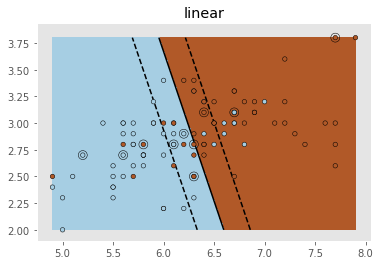

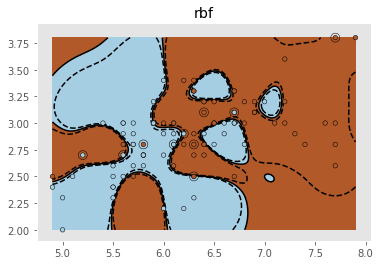

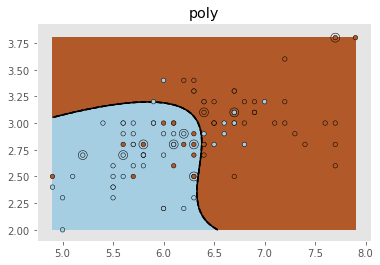

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]


for kernel in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(kernel=kernel, gamma=10,C=1e5)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

 
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

# Referencias:

- https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
- https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py
- https://scikit-learn.org/stable/supervised_learning.html

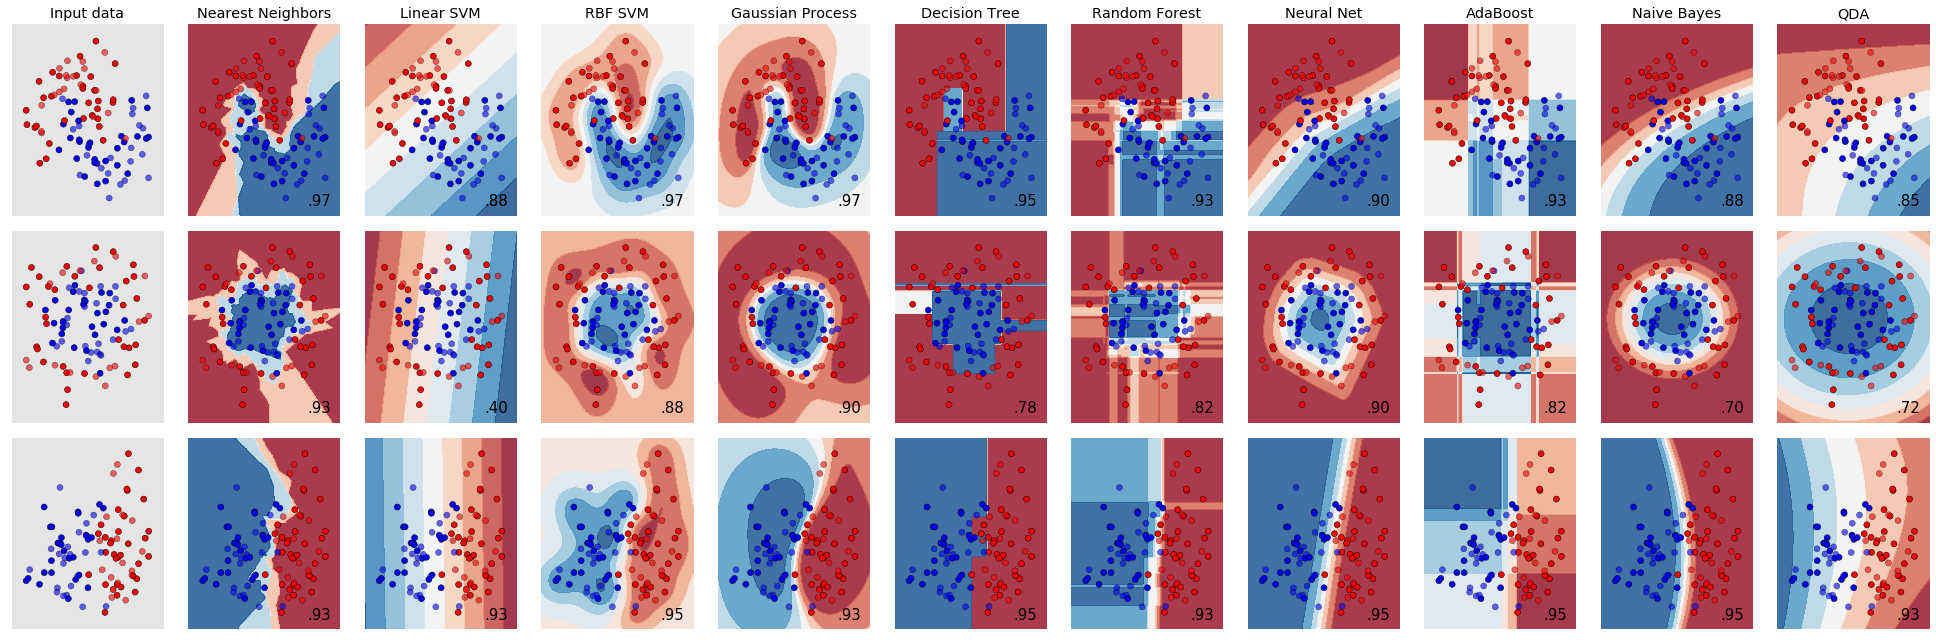

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

